In [1]:
import os
os.chdir("../..")

In [2]:
from shell.fleet.comm_constraints import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_1158875/695197892.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
# === Receiver Constraints ===
no_queries_ls = [5, 10, 25]
no_neighbors_ls = [5, 10, 25]
data_pt_size = compute_data_pt_size()
receiver_freqs = [1, 2, 3]
print("Data point size: ", data_pt_size)
## === ===

## === Sender Constraints ===
no_data_pts_ls = [25, 32, 50, 64]
sender_freqs = [1, 5, 10]
## === ===


## === FL ===
layer_size = 64
depth = 4
model_size = compute_mlp_model_size(layer_size, depth)
fl_freqs = [1, 10, 20, 50]
print("Model size: ", model_size)
## === ===

## === Module ===
component_size = compute_mlp_module_size(layer_size)
no_exchanged_components = [1, 2, 3, 4]
module_freqs = [1, 2, 3]
print("Module size: ", component_size)
## === ===

Data point size:  784
Model size:  16640
Module size:  4160


In [4]:
# Create empty lists to store results
methods = []
frequencies = []
cost_per_communication = []
total_costs = []
info = []  # Create an empty list to store the info

# Compute for Receiver
for no_queries in no_queries_ls:
    for no_neighbors in no_neighbors_ls:
        for freq in receiver_freqs:
            b = compute_receiver_cost(no_queries, no_neighbors, data_pt_size, 1)
            B = compute_receiver_cost(no_queries, no_neighbors, data_pt_size, freq)
            methods.append('Receiver')
            frequencies.append(freq)
            cost_per_communication.append(b)
            total_costs.append(B)
            info.append({'no_queries': no_queries, 'no_neighbors': no_neighbors})  # Append the info for Receiver

# Compute for Sender
for no_data_pts in no_data_pts_ls:
    for freq in sender_freqs:
        b = compute_sender_cost(no_data_pts, data_pt_size, 1)
        B = compute_sender_cost(no_data_pts, data_pt_size, freq)
        methods.append('Sender')
        frequencies.append(freq)
        cost_per_communication.append(b)
        total_costs.append(B)
        info.append({'no_data_pts': no_data_pts})  # Append the info for Sender

# Compute for FL
for freq in fl_freqs:
    b = compute_fedavg_cost(model_size, 1)
    B = compute_fedavg_cost(model_size, freq)
    methods.append('FL')
    frequencies.append(freq)
    cost_per_communication.append(b)
    total_costs.append(B)
    info.append({})  # Append empty info for FL since there are no special parameters for FL



# Compute for FL
for freq in fl_freqs:
    b = compute_fedcurv_cost(model_size, 1)
    B = compute_fedcurv_cost(model_size, freq)
    methods.append('FedCurv')
    frequencies.append(freq)
    cost_per_communication.append(b)
    total_costs.append(B)
    info.append({})  # Append empty info for FL since there are no special parameters for FL



# Compute for Module
for no_exchanged in no_exchanged_components:
    for freq in module_freqs:
        b = compute_modular_cost(no_exchanged, component_size, 1)
        B = compute_modular_cost(no_exchanged, component_size, freq)
        methods.append('Module')
        frequencies.append(freq)
        cost_per_communication.append(b)
        total_costs.append(B)
        info.append({'no_exchanged': no_exchanged})  # Append the info for Module

# Create the DataFrame
df = pd.DataFrame({
    'Method': methods,
    'Frequency': frequencies,
    'Cost A': cost_per_communication,
    'Cost B': total_costs,
    'Info': info
})

In [5]:
# Create pandas dataframe
df = pd.DataFrame({
    'Method': methods,
    'Frequency': frequencies,
    'b (Cost per Communication)': cost_per_communication,
    'B (Total Cost)': total_costs,
    'Info': info,
})

In [6]:
df['log_B'] = np.log(df['B (Total Cost)'])
df['log_b'] = np.log(df['b (Cost per Communication)'])

In [7]:
df

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b
0,Receiver,1,23520,23520,"{'no_queries': 5, 'no_neighbors': 5}",10.065606,10.065606
1,Receiver,2,23520,47040,"{'no_queries': 5, 'no_neighbors': 5}",10.758754,10.065606
2,Receiver,3,23520,70560,"{'no_queries': 5, 'no_neighbors': 5}",11.164219,10.065606
3,Receiver,1,43120,43120,"{'no_queries': 5, 'no_neighbors': 10}",10.671742,10.671742
4,Receiver,2,43120,86240,"{'no_queries': 5, 'no_neighbors': 10}",11.364889,10.671742
5,Receiver,3,43120,129360,"{'no_queries': 5, 'no_neighbors': 10}",11.770354,10.671742
6,Receiver,1,101920,101920,"{'no_queries': 5, 'no_neighbors': 25}",11.531943,11.531943
7,Receiver,2,101920,203840,"{'no_queries': 5, 'no_neighbors': 25}",12.225091,11.531943
8,Receiver,3,101920,305760,"{'no_queries': 5, 'no_neighbors': 25}",12.630556,11.531943
9,Receiver,1,47040,47040,"{'no_queries': 10, 'no_neighbors': 5}",10.758754,10.758754


In [8]:
df['sqrt_b'] = np.sqrt(df['b (Cost per Communication)'])

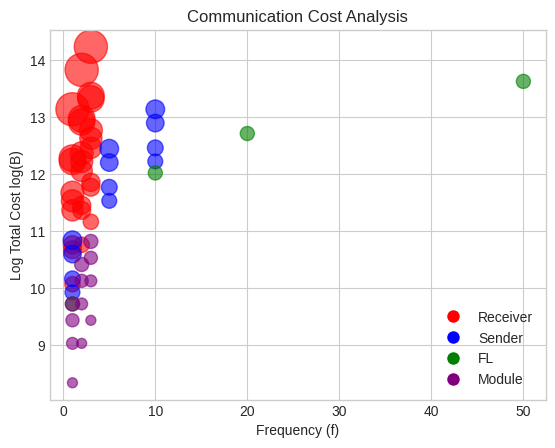

In [30]:
# Plotting
colors = {'Receiver': 'red', 'Sender': 'blue', 'FL': 'green', 'Module': 'purple'}
plt.scatter(df['Frequency'], df['log_B'],c=df['Method'].apply(lambda x: colors[x]), 
s=df['sqrt_b'] * 0.8, alpha=0.6) # multiply by 10 (or any factor) to adjust dot size if needed
plt.xlabel('Frequency (f)')
plt.ylabel('Log Total Cost log(B)')
plt.title('Communication Cost Analysis')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, label=key) for key in colors])
plt.show()

In [18]:
df.loc[(df['Method'] == 'FL') & (df['Frequency'] == 10)]

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
40,FL,10,16640,166400,{},12.02215,9.719565,128.996124


In [23]:
df.loc[(df['Method'] == 'Receiver') & (df['Frequency'] == 2)]

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
1,Receiver,2,23520,47040,"{'no_queries': 5, 'no_neighbors': 5}",10.758754,10.065606,153.362316
4,Receiver,2,43120,86240,"{'no_queries': 5, 'no_neighbors': 10}",11.364889,10.671742,207.653558
7,Receiver,2,101920,203840,"{'no_queries': 5, 'no_neighbors': 25}",12.225091,11.531943,319.249119
10,Receiver,2,47040,94080,"{'no_queries': 10, 'no_neighbors': 5}",11.451901,10.758754,216.887067
13,Receiver,2,86240,172480,"{'no_queries': 10, 'no_neighbors': 10}",12.058037,11.364889,293.666477
16,Receiver,2,203840,407680,"{'no_queries': 10, 'no_neighbors': 25}",12.918238,12.225091,451.486434
19,Receiver,2,117600,235200,"{'no_queries': 25, 'no_neighbors': 5}",12.368191,11.675044,342.928564
22,Receiver,2,215600,431200,"{'no_queries': 25, 'no_neighbors': 10}",12.974327,12.281180,464.327471
25,Receiver,2,509600,1019200,"{'no_queries': 25, 'no_neighbors': 25}",13.834529,13.141381,713.862732


In [24]:
df.loc[(df['Method'] == 'Receiver') & (df['Frequency'] == 2) & (df['B (Total Cost)'] == 172480)] # second to most expensive.

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
13,Receiver,2,86240,172480,"{'no_queries': 10, 'no_neighbors': 10}",12.058037,11.364889,293.666477


In [15]:
df.loc[(df['Method'] == 'Sender') & (df['Frequency'] == 5)]

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
28,Sender,5,20384,101920,{'no_data_pts': 25},11.531943,9.922506,142.772546
31,Sender,5,25872,129360,{'no_data_pts': 32},11.770354,10.160917,160.847754
34,Sender,5,39984,199920,{'no_data_pts': 50},12.205673,10.596235,199.959996
37,Sender,5,50960,254800,{'no_data_pts': 64},12.448234,10.838796,225.743217


In [16]:
df.loc[(df['Method'] == 'Sender') & (df['Frequency'] == 5) & (df['B (Total Cost)'] == 129360)] # most expensive.

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
31,Sender,5,25872,129360,{'no_data_pts': 32},11.770354,10.160917,160.847754


In [20]:
df.loc[(df['Method'] == 'Module') & (df['Frequency'] == 1)]

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
43,Module,1,4160,4160,{'no_exchanged': 1},8.333270,8.333270,64.498062
46,Module,1,8320,8320,{'no_exchanged': 2},9.026418,9.026418,91.214034
49,Module,1,12480,12480,{'no_exchanged': 3},9.431883,9.431883,111.713920
52,Module,1,16640,16640,{'no_exchanged': 4},9.719565,9.719565,128.996124


In [21]:
df.loc[(df['Method'] == 'Module') & (df['Frequency'] == 1) & (df['B (Total Cost)'] == 12480)]

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
49,Module,1,12480,12480,{'no_exchanged': 3},9.431883,9.431883,111.71392


In [25]:
# Extract rows based on the given conditions
fl_row = df.loc[(df['Method'] == 'FL') & (df['Frequency'] == 10)]
receiver_row = df.loc[(df['Method'] == 'Receiver') & (df['Frequency'] == 2) & (df['B (Total Cost)'] == 172480)]
sender_row = df.loc[(df['Method'] == 'Sender') & (df['Frequency'] == 5) & (df['B (Total Cost)'] == 129360)]
module_row = df.loc[(df['Method'] == 'Module') & (df['Frequency'] == 1) & (df['B (Total Cost)'] == 12480)]

# Combine these rows into a new dataframe
new_df = pd.concat([fl_row, receiver_row, sender_row, module_row], axis=0)
new_df

,Method,Frequency,b (Cost per Communication),B (Total Cost),Info,log_B,log_b,sqrt_b
40,FL,10,16640,166400,{},12.022150,9.719565,128.996124
13,Receiver,2,86240,172480,"{'no_queries': 10, 'no_neighbors': 10}",12.058037,11.364889,293.666477
31,Sender,5,25872,129360,{'no_data_pts': 32},11.770354,10.160917,160.847754
49,Module,1,12480,12480,{'no_exchanged': 3},9.431883,9.431883,111.713920


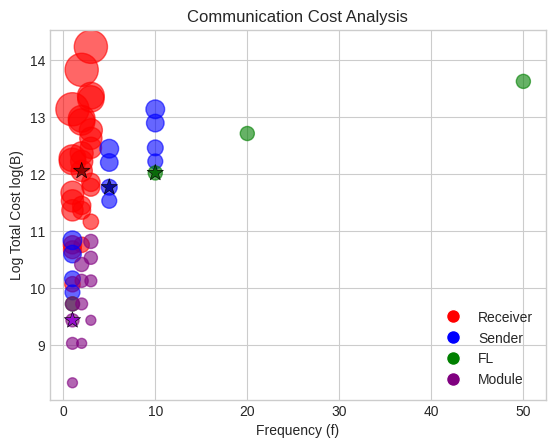

In [37]:
# Existing plotting code
colors = {'Receiver': 'red', 'Sender': 'blue', 'FL': 'green', 'Module': 'purple'}
plt.scatter(df['Frequency'], df['log_B'],c=df['Method'].apply(lambda x: colors[x]), 
s=df['sqrt_b'] * 0.8, alpha=0.6)

# Highlighting the specific dots
highlight_colors = {'Receiver': 'darkred', 'Sender': 'darkblue', 'FL': 'darkgreen', 'Module': 'darkviolet'}
plt.scatter(new_df['Frequency'], new_df['log_B'], c=new_df['Method'].apply(lambda x: highlight_colors[x]), 
s=150, marker='*', edgecolors='black', linewidths=0.5, alpha=0.9)

# Rest of the code
plt.xlabel('Frequency (f)')
plt.ylabel('Log Total Cost log(B)')
plt.title('Communication Cost Analysis')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, label=key) for key in colors])
plt.show()
